In [2]:
import re
import matplotlib.pyplot as plt

In [3]:
file = 'batch_processing_rate'
with open(file, 'r') as f:
    text = f.read()
lines = text.splitlines()
lines[:2]

['batch number: 1; elapsed time: 5.0338 seconds.',
 'batch number: 2; elapsed time: 5.6701 seconds.']

In [4]:
batch_number_list = []
time_list = []
regex = r'batch number: (?P<batch_number>\d+); ' \
        r'elapsed time: (?P<elapsed_time>\d+\.\d+) seconds.'
regex = re.compile(regex)
for line in lines:
    match_object = regex.match(line)
    if match_object is None:
        continue
    batch_number = int(match_object.group('batch_number'))
    elapsed_time = float(match_object.group('elapsed_time'))
    batch_number_list.append(batch_number)
    time_list.append(elapsed_time)
    
batch_number_list[:2], time_list[:2]

([1, 2], [5.0338, 5.6701])

In [6]:
diff_time_list = []
last_time = 0
for i in range(len(time_list)):
    diff = time_list[i] - last_time
    diff_time_list.append(diff)
    last_time = time_list[i]
    
diff_time_list[:2]

[5.0338, 0.6362999999999994]

In [7]:
start_i = 0
end_i = -1

Text(0.5, 1.0, 'total time')

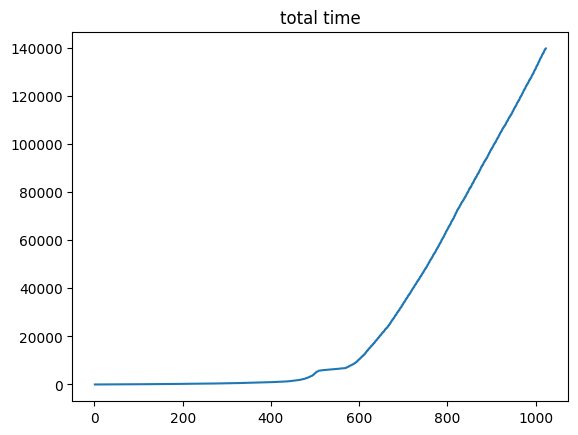

In [14]:
plt.plot(batch_number_list[start_i:end_i], time_list[start_i:end_i])
plt.title('total time')

We can see that there is a sharp increase in the processing time after batch NO. 600. I think that this is probably because of memory running out, and having to move things in and out of cache.

Text(0.5, 1.0, 'time per batch')

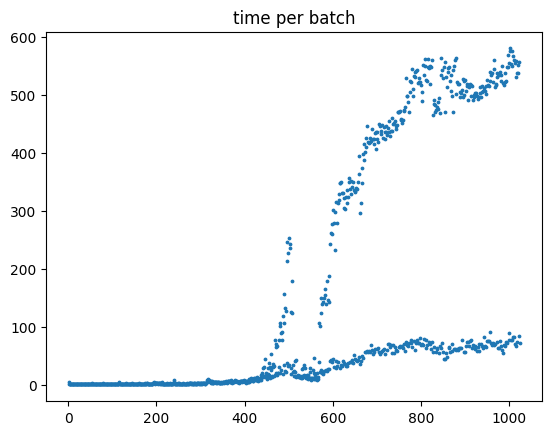

In [15]:
plt.scatter(batch_number_list[start_i:end_i], diff_list[start_i:end_i], s=3)
plt.title('time per batch')

We can see that the time per batch keeps increasing as we continue, which can result in a very long time if we let this effect accumulate.

In [16]:
total_time = time_list[-1]
total_time_in_hours = total_time / 3_600
n_batches = batch_number_list[-1]
n_samples_in_bookcorpus = 74_004_228
batch_size = 4_000
n_batches_total = n_samples_in_bookcorpus // batch_size
print(f'took {total_time_in_hours} hours to process {n_batches} out of {n_batches_total} batches')

took 38.931667250000004 hours to process 1024 out of 18501 batches
